# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

An online news portal aims to expand its business by acquiring new subscribers.  Based on the chosen metrics below, we will use a/b testing to explore whether our new feature and landing page attracts more users.  

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
df = pd.read_csv('abtest.csv')

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.shape

(100, 6)

There are 100 rows and 6 columns. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are four columns with object type, one interger, and one with floating values.  

In [8]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no null values in the dataset.  

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [10]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

There are two groups with equal data points taken. 

In [11]:
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

There are two landing pages with equal data points taken. 

In [12]:
df['time_spent_on_the_page'].value_counts()

3.88    2
7.16    2
4.75    2
6.04    2
5.86    2
       ..
6.60    1
1.81    1
9.15    1
2.90    1
6.18    1
Name: time_spent_on_the_page, Length: 94, dtype: int64

It looks like there aren't any data points with more than two occurrences in the dataset. 

In [13]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

There are more data points taken for users which converted than users which did not convert. 

In [14]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

There are more data points for users which prefer Spanish and French language than English language.  This could skew data and conclusions if not careful. 

### Univariate Analysis

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

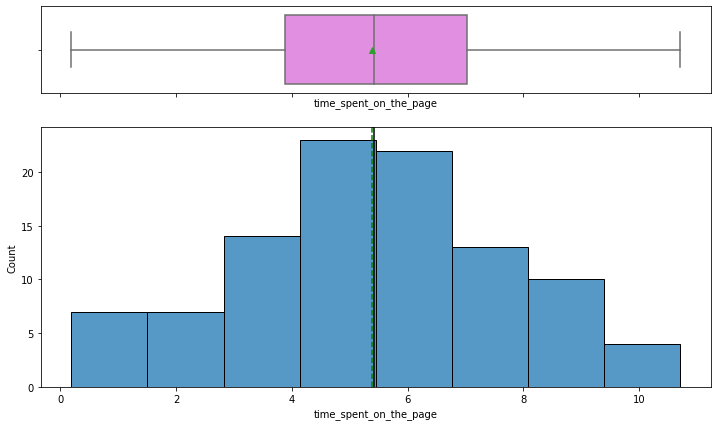

In [22]:
histogram_boxplot(df, 'time_spent_on_the_page', figsize=(12, 7), kde=False, bins=None)

The normality of the graph above is apparent when graphing the time spent on the page.  

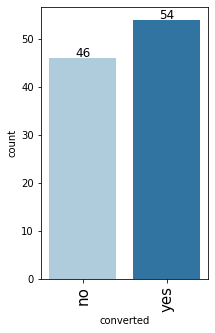

In [23]:
labeled_barplot(df, 'converted', perc=False, n=None)

There were more data points taken for users which converted. 

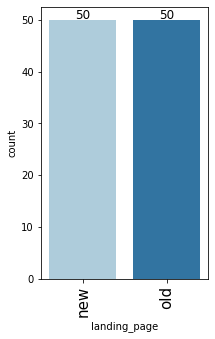

In [24]:
labeled_barplot(df, 'landing_page', perc=False, n=None)

There were an equal number of data points taken for the new and old landing pages.  

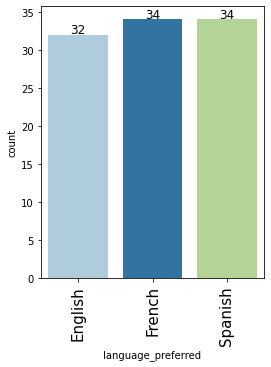

In [26]:
labeled_barplot(df, 'language_preferred', perc=False, n=None)

There were more data points taken from users which preferred the languages French and Spanish than English. 

### Bivariate Analysis

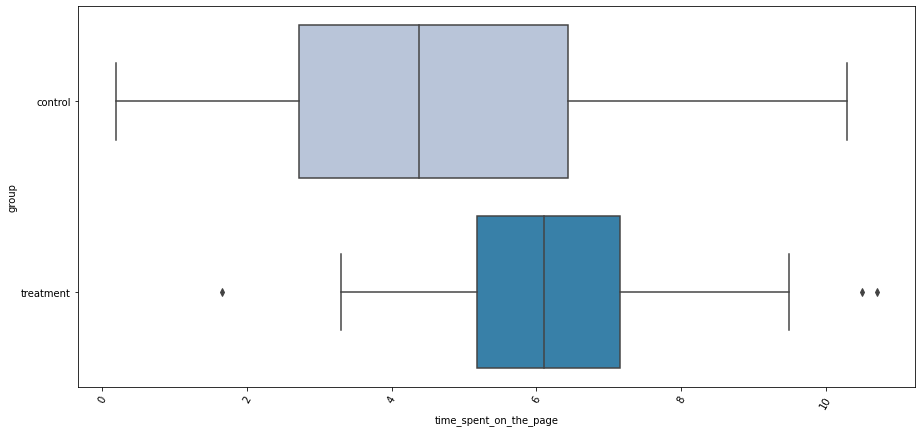

In [27]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "time_spent_on_the_page", y = "group", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

The treatment group has a higher median than the control group.  The treatment group outcomes should be taken into consideration and implemented into the page for higher time to be spent on the page by new users. 

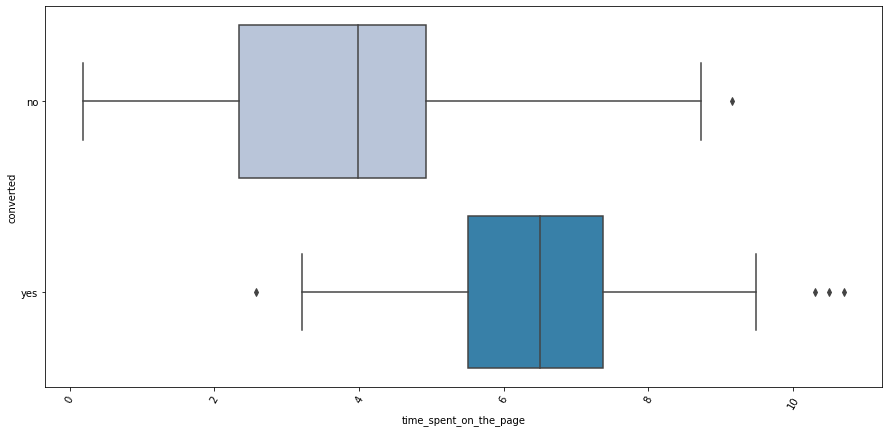

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "time_spent_on_the_page", y = "converted", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

It makes sense that the users which were more interested in the page would spend more time on the page and convert more often than users which spent less time on the page.   

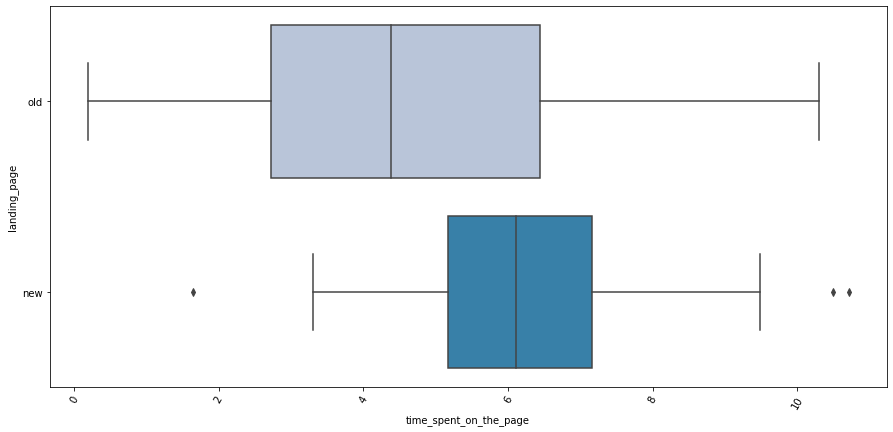

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "time_spent_on_the_page", y = "landing_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

The time spent on the new page has less of a spread than the old page, therefore the outcome is more predictable and reliable when implementing the new page.  The higher median indicates a possible higher time spend on the new page than the old page by users. 

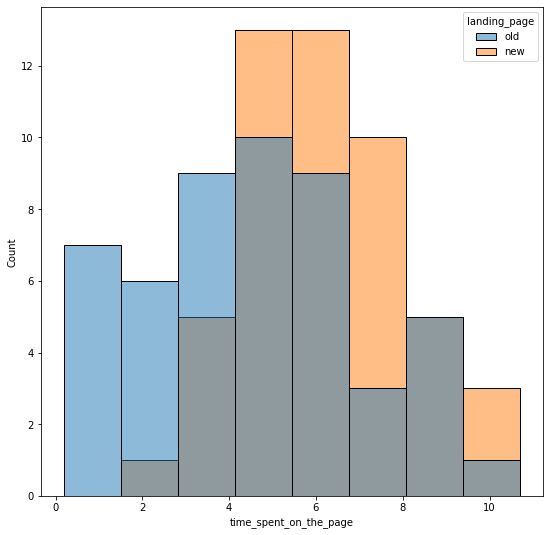

In [30]:
# new and old landing page overlap
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'landing_page')
plt.show()

The new page, on average, takes up more of the higher counts and time spent on the the page than the old page.  This indicates that the new page is more successful in keeping the attention of users to spend more time on the page.  

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

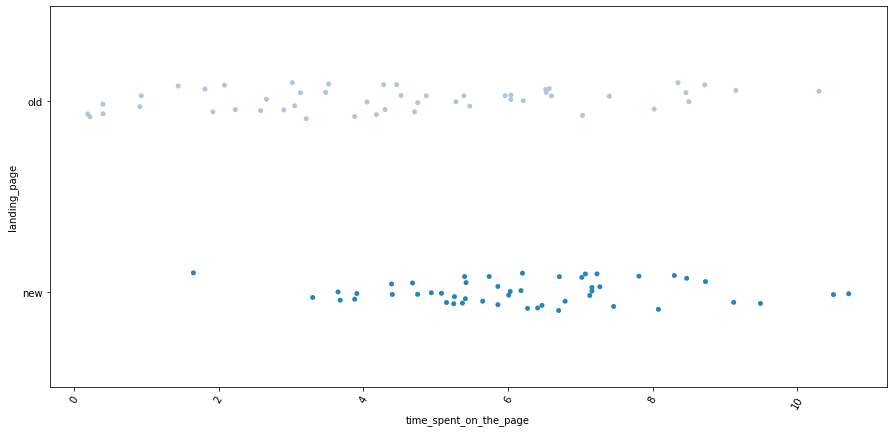

In [31]:
# introducing the data 
plt.figure(figsize=(15,7))
sns.stripplot(x = "time_spent_on_the_page", y = "landing_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

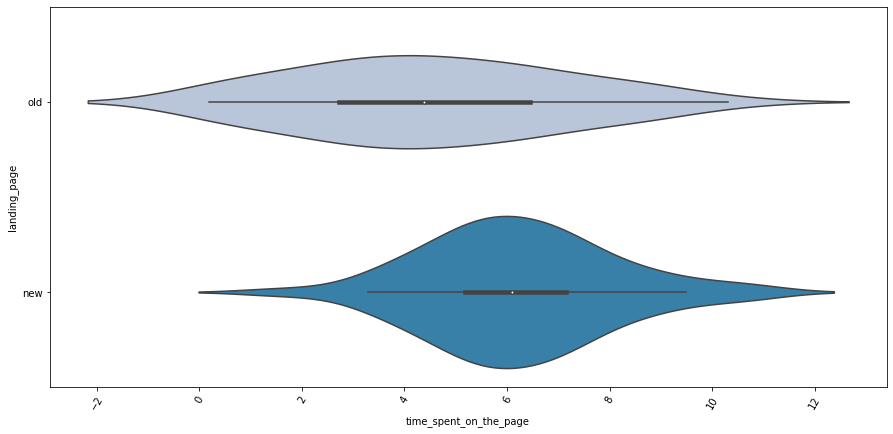

In [32]:
plt.figure(figsize=(15,7))
sns.violinplot(x = "time_spent_on_the_page", y = "landing_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Insight: 

The mean of the new landing page is at a larger time spent on the page, in comparison to the old landing page.  Although this is true, the spread of the time spend on the old landing page is larger than the new landing page.  The predictability of time spent on the page for the new landing page is higher than the old landing page, which has a larger spread.  Nevertheless, further analysis is required. 

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time spent on the new landing page and the old landing page respectively.

We want to test whether there is an increase in the time spent on the landing page of the new landing page versus the old landing page. 

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

# Independent (unpaired) two-sample t-test

### Step 3: Decide the significance level

The level of significance, or alpha value, is 0.05.  This reflects the margin of error, which in this case allows a 5% chance for error to occur.  This value allows us to calculate and make conclusions about the data with confidence.  

### Step 4: Collect and prepare data

In [45]:
df_new = df[df.landing_page=='new']
df_new

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


In [65]:
df_old = df[df.landing_page=='old']
df_old

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English
10,546588,control,old,6.21,yes,Spanish
11,546546,control,old,2.58,yes,English
14,546578,control,old,8.72,yes,Spanish
17,546555,control,old,0.40,no,English
18,546493,control,old,10.30,yes,English


In [72]:
print("The sample standard deviation of the time spent on the new page is:", round((df_new['time_spent_on_the_page']).std(),2))
print("The sample standard deviation of the time spent on the old page is:", round((df_old['time_spent_on_the_page']).std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


### Step 5: Calculate the p-value

In [73]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind((df_new['time_spent_on_the_page']), (df_old['time_spent_on_the_page']), equal_var = False, alternative = 'greater')

print("The p-value is", p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [74]:
print("The p-value is", p_value)
print("Alpha is equal to 0.05")

if p_value < 0.05: 
    print('As the p-value is less than the level of significance, we reject the null hypothesis.')
else: 
     print('As the p-value is less than the level of significance, we fail to reject the null hypothesis.')

The p-value is 0.0001392381225166549
Alpha is equal to 0.05
As the p-value is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since we reject the null hypothesis, we conclude that $\mu_1$, the mean value of the time spent on the new landing page, is greater than $\mu_2$, the mean value of the time spend on the old landing page.  

Although there was a larger spread in the time spent on the old page than the new page, which could be observed in the graphs and by the calculated standard deviation values, further analysis indicates that this spread did not equate to a significant outcome of equal mean value.    

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

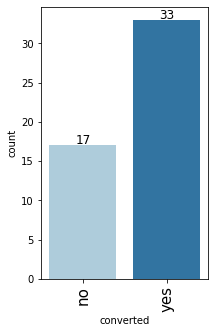

In [84]:
#visual analysis 
labeled_barplot(df_new, 'converted', perc=False, n=None)

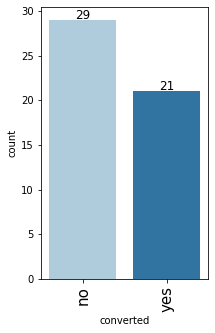

In [85]:
#visual analysis 
labeled_barplot(df_old, 'converted', perc=False, n=None)

As seen in the bar plots above, there were the same amount of data points taken from users who visited the old and the new page.  The totals indicate that there were more people who converted while using the new page.  Estimating without further analysis, one could say that the new landing page has a more successful conversion rate.  

### The null and alternative hypothesis
Let $p_1,p_2$ be the proportions or conversion rate for the new landing page and old landing page respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 >p_2$

# Two Proportion Z-test

The level of significance, or alpha value, is 0.05.  This reflects the margin of error, which in this case allows a 5% chance for error to occur.  This value allows us to calculate and make conclusions about the data with confidence.  

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
new_converted = df[(df['landing_page'] == 'new') & (df['converted'] == 'yes')] 
new_converted.value_counts('converted')

In [ ]:
old_converted = df[(df['landing_page'] == 'old') & (df['converted'] == 'yes')] 
old_converted.value_counts('converted')

In [ ]:
# set the counts of defective items
number_converted = np.array([33, 21])

# set the sample sizes 
new_old_page = np.array([50, 50])

test_stat, p_value = proportions_ztest(number_converted, new_old_page)
print('The p-value is ' + str(p_value))

The p-value is less than the alpha or significance level, therefore, we reject the null hypothesis.  The proportion of people who converted on the new landing page is greater than the old landing page.  

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

<AxesSubplot:xlabel='language_preferred', ylabel='converted'>

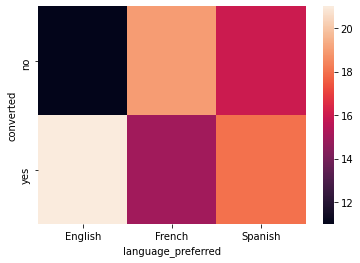

In [89]:
sns.heatmap(crosstab)

The preferred English language is on two ends of the spectrum.  There is a very high correlation of them converting and a very low correlation of them not converting.  French and Spanish correlations are approximately opposite.  Further analysis is needed to prove the significance of the findings from this correlation heatmap.  The trends are seen, but no significant conclusions can be made.  

### The null and alternative hypothesis

We will test the null hypothesis

>$H_0:$ Conversion is independent of language.

against the alternate hypothesis

>$H_a:$ Conversion depends on language.

# Chi-Square Test for Independence

The level of significance, or alpha value, is 0.05.  This reflects the margin of error, which in this case allows a 5% chance for error to occur.  This value allows us to calculate and make conclusions about the data with confidence.  

## Finding the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

In [88]:
crosstab = pd.crosstab(df['converted'], df['language_preferred'])
crosstab

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(crosstab)
print('The p-value is', p_value)

Since the p-value is greater than alpha, we fail to reject the null hypothesis.  The conversion is independent of language.  The users will convert, despite their language preferred.  

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

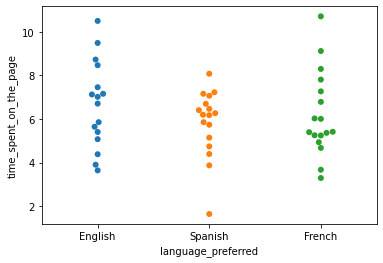

In [96]:
# visual analysis
ax = sns.swarmplot(x="language_preferred", y="time_spent_on_the_page", data=df_new, size=6)

As seen in the graph above, there is a large spread for each of the languages, so it is hard to make any conclusions without further analysis about the time spent on the new page.  It seems that English users spend the most time on the page, just by looking at the graph without further analysis.   

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for languages English, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one of the languages' time spent on the new page is different from the rest.


# One-Way ANOVA Test

The level of significance, or alpha value, is 0.05.  This reflects the margin of error, which in this case allows a 5% chance for error to occur.  This value allows us to calculate and make conclusions about the data with confidence. 

In [93]:
# mean of time spent for different languages
print(df_new.groupby("language_preferred")["time_spent_on_the_page"].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent does not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

#### 3 columns of data
We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [95]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p value is greater than the significance level, we fail to reject the null hypothesis which states that all of the population variances are equal.  

In [94]:
#import the required function
from scipy.stats import f_oneway

# put in the 3 columns 
# perform one-way anova test
test_stat, p_value = f_oneway(df_new.loc[df_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight
As the p-value is more than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that any of the times spent on the page are different from the rest at 5% significance level.

Multiple comparison tests are not necessary in this case. 

## Conclusion and Business Recommendations

The mean time spent on the new landing page is greater than the old landing page.  This gives us insight on the users interest in the content of the new page versus the old page.  
The proportion of users which converted is greater on the new landing page than the old landing page. This tells us that the new content focused towards conversion on the new landing page is better than on the old landing page.  
The conversion is independent of language.  This could be seen positively, concluding that there most likely isn't something on the website which caters to the conversion rate of people speaking one language versus the other. Depending on the current website layout, we could also see this as an opportunity to expand the attraction to all languages for a better conversion rate. According to the heatmap, it seems as though the French and Spanish language attractions could be improved upon.  
The time spent follows a normal distribution 
Normal distribution is a continuous probability distribution wherein values lie in a symmetrical fashion mostly situated around the mean
As seen in the first figure under univariate analysis, the values lie around the mean.  This is good, since skewness would prove that there was room for improvement on one side of the graph or the other.  no improvement is needed, as the values fall around the mean.  
All of the population variances are equal 
As seen in figure_, the variability for each of the languages preferred are equal.  This proves that the website isn't skewed towards one language or the other.  